# File and libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath = r'dataset/df_ecom_data_prep_encoded.csv'


file_tag = "df_ecom_encoded"

# DSLabs functions

In [23]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

# Load

In [33]:
# test_data=True
test_data=False

if test_data==True:

    df=pd.read_csv(filepath)

    # 10% sample
    df=df.sample(frac=0.1, replace=False)
    

else:
    df=pd.read_csv(filepath)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69884 entries, 0 to 69883
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_type           69884 non-null  int64  
 1   category_code_lvl_1  62736 non-null  float64
 2   category_code_lvl_2  62736 non-null  float64
 3   category_code_lvl_3  61240 non-null  float64
 4   price                69884 non-null  float64
 5   conversion           69884 non-null  int64  
 6   week_of_month        69884 non-null  int64  
 7   is_weekend           69884 non-null  int64  
 8   day                  69884 non-null  int64  
 9   time_of_day_sin      69884 non-null  float64
 10  time_of_day_cos      69884 non-null  float64
 11  day_of_week_sin      69884 non-null  float64
 12  day_of_week_cos      69884 non-null  float64
 13  hour_sin             69884 non-null  float64
 14  hour_cos             69884 non-null  float64
 15  min_sin              69884 non-null 

In [15]:
df.head()

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,5.0,40.0,76.0,14.13,0,1,0,1,0.0,1.0,0.866,-0.5,0.942,-0.335,0.596,0.803
1,0,11.0,57.0,122.0,1280.32,0,2,1,17,0.0,-1.0,-0.000,1.0,-0.631,-0.776,-0.159,-0.987
2,0,0.0,6.0,10.0,20.59,0,1,1,11,0.0,1.0,0.000,1.0,0.398,-0.917,0.413,0.911
3,0,7.0,50.0,101.0,82.34,0,1,0,7,-0.0,1.0,1.000,0.0,0.979,0.203,-0.787,-0.618
4,0,6.0,46.0,97.0,144.12,0,3,1,24,-0.0,1.0,-0.000,1.0,-0.731,0.683,-0.159,-0.987


# Missing Values Analysis

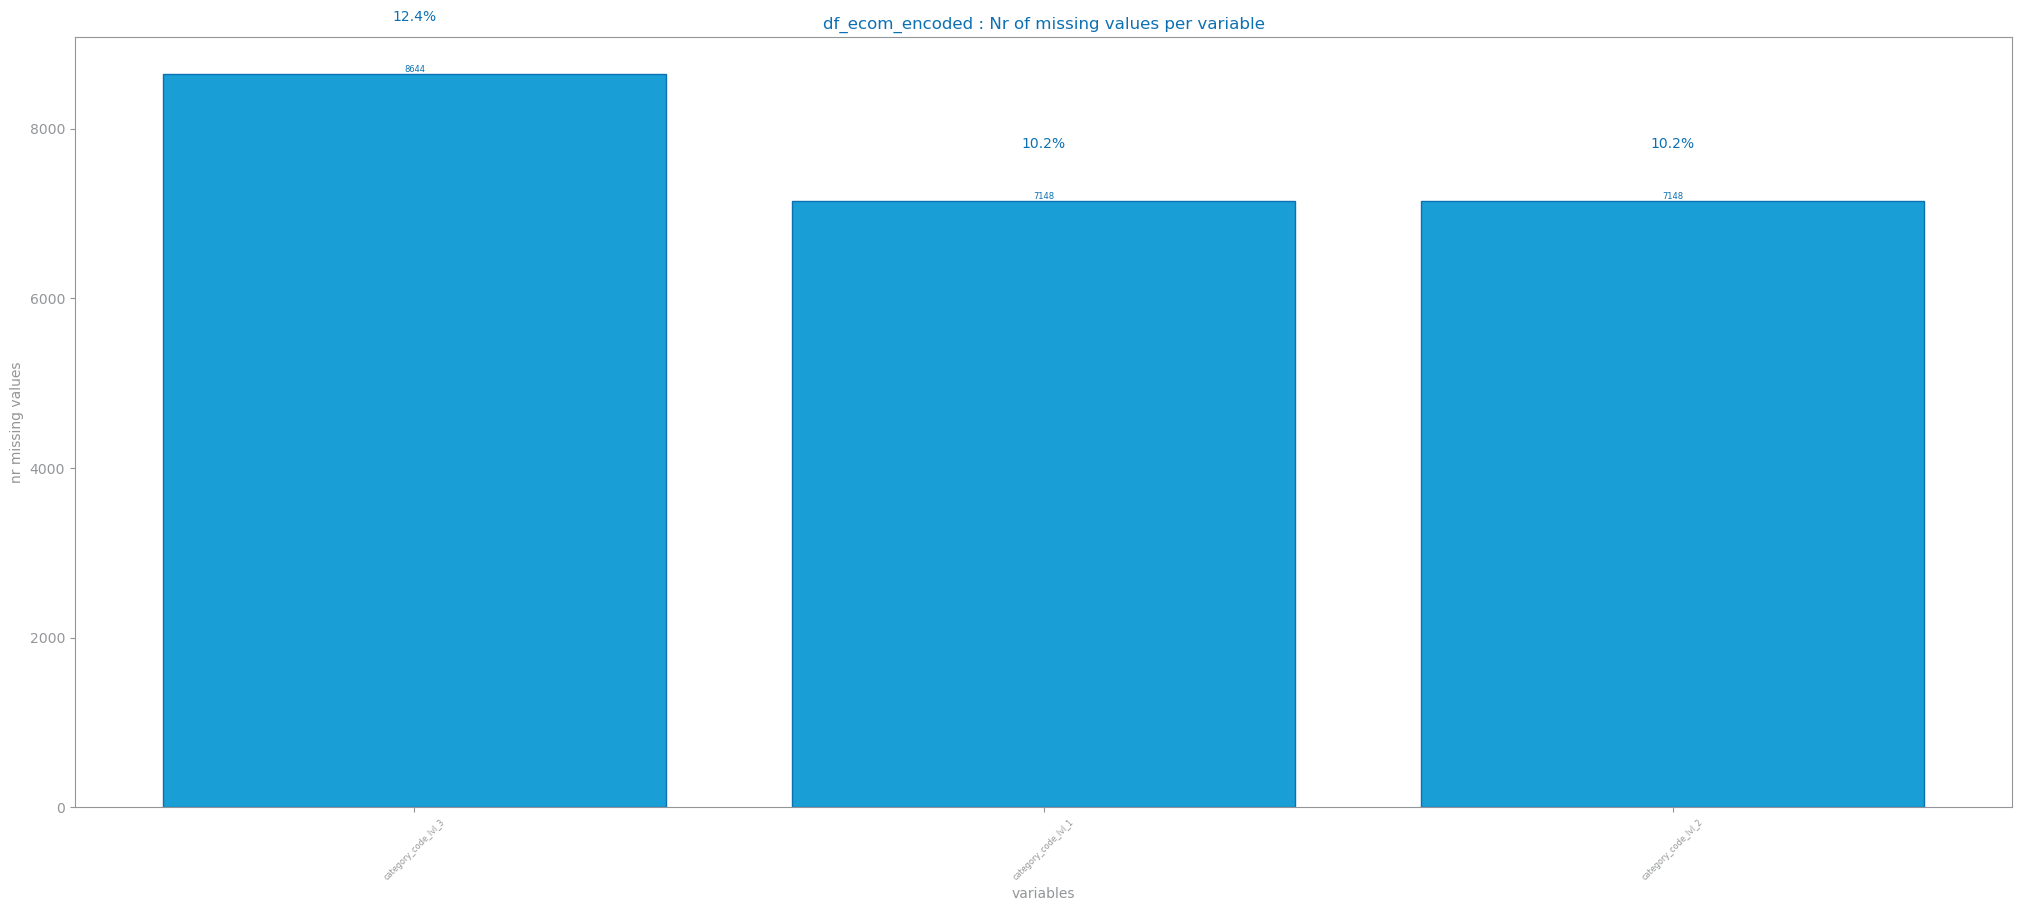

In [34]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - Most Frequent Srategy

## MV1 strategy aplication

In [38]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter
df_1 =  mvi_by_filling(df, strategy="frequent")

df_1.describe()

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,day,time_of_day_sin,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,conversion,is_weekend,time_of_day_cos
count,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000,69884.0,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000,69884.000000
mean,0.091337,5.314126,32.064014,74.718240,274.110808,2.065494,16.113731,0.0,0.561406,0.245341,-0.000339,-0.258363,-0.001157,0.014295,0.021579,0.267200,0.198014
std,0.355181,3.935390,19.714559,39.076018,357.442205,0.984063,8.325692,0.0,0.381784,0.691995,0.752316,0.606134,0.701193,0.712833,0.145304,0.442501,0.980206
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,-0.000000,-0.866000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,15.000000,49.000000,51.460000,1.000000,10.000000,0.0,-0.000000,-0.500000,-0.817000,-0.776000,-0.687500,-0.698000,0.000000,0.000000,-1.000000
50%,0.000000,5.000000,32.064014,74.718240,148.940000,2.000000,17.000000,0.0,0.500000,0.500000,0.000000,-0.335000,0.000000,0.080000,0.000000,0.000000,1.000000
75%,0.000000,11.000000,57.000000,120.000000,344.192500,3.000000,23.000000,0.0,0.866000,1.000000,0.817000,0.203000,0.678000,0.735000,0.000000,1.000000,1.000000
max,2.000000,12.000000,61.000000,131.000000,2574.070000,4.000000,29.000000,0.0,1.000000,1.000000,0.998000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## MV1 target class

In [39]:
from numpy import array, ndarray

target = "conversion"
labels: list = list(df_1[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(df_1[df_1[target] == negative]),
        len(df_1[df_1[target] == positive]),
    ]
}

y: array = df_1.pop(target).to_list()
X: ndarray = df_1.values

Labels=[0.0, 1.0]


## MV1 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

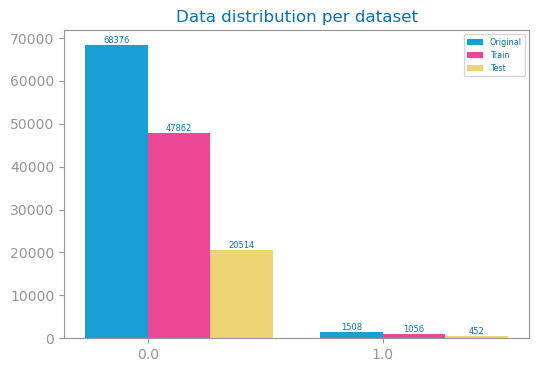

In [40]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=df_1.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=df_1.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

In [41]:
print("Train labels (trnY):", trnY)
print("Test labels (tstY):", tstY)

Train labels (trnY): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [42]:
print("Colunas do DataFrame de treino:", train.columns)
print("Colunas do DataFrame de teste:", test.columns)

Colunas do DataFrame de treino: Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'day',
       'time_of_day_sin', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos', 'min_sin', 'min_cos', 'is_weekend', 'time_of_day_cos',
       'conversion'],
      dtype='object')
Colunas do DataFrame de teste: Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'day',
       'time_of_day_sin', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos', 'min_sin', 'min_cos', 'is_weekend', 'time_of_day_cos',
       'conversion'],
      dtype='object')


## MV1 evaluate

In [43]:
print("Colunas do DataFrame de treino:", train.columns)
print("Colunas do DataFrame de teste:", test.columns)

Colunas do DataFrame de treino: Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'day',
       'time_of_day_sin', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos', 'min_sin', 'min_cos', 'is_weekend', 'time_of_day_cos',
       'conversion'],
      dtype='object')
Colunas do DataFrame de teste: Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'day',
       'time_of_day_sin', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin',
       'hour_cos', 'min_sin', 'min_cos', 'is_weekend', 'time_of_day_cos',
       'conversion'],
      dtype='object')


In [44]:
def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "conversion", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval

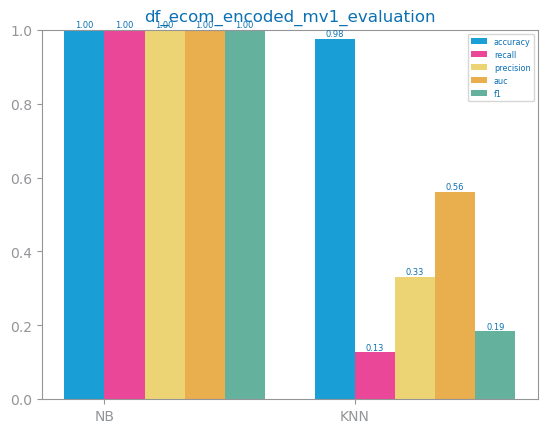

In [45]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

figure()
eval: dict[str, list] = evaluate_approach(train, test, target='conversion', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}_mv1_evaluation", percentage=True
)
#savefig(f"images/{file_tag}_mv1_evaluation.png")
show()

# MV2 - drop null strategy

2. Remove remaining null values records

## MV2 strategy aplication

In [46]:
print("Dimensões antes da remoção:", df.shape)


Dimensões antes da remoção: (69884, 17)


In [47]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]
df_2 = df.dropna(axis=0, how="any")

# Depois de remover os missing values
print("Dimensões após a remoção:", df_2.shape)


Dimensões após a remoção: (61240, 17)


## MV2 target class

In [48]:
from numpy import array, ndarray

target = "conversion"
labels: list = list(df_2[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(df_2[df_2[target] == negative]),
        len(df_2[df_2[target] == positive]),
    ]
}

y: array = df_2.pop(target).to_list()
X: ndarray = df_2.values

Labels=[0, 1]


## MV2 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

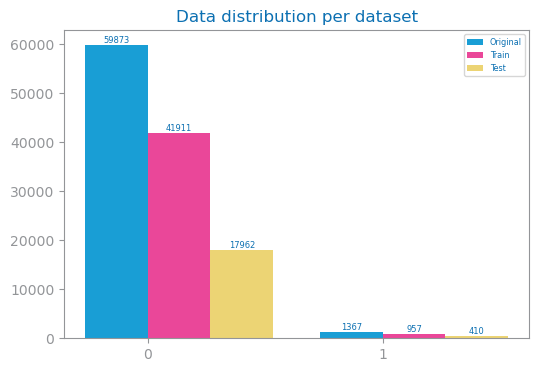

In [49]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=df_2.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=df_2.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## MV2 evaluate

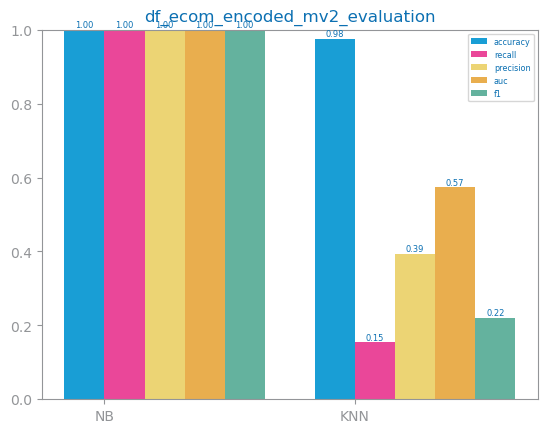

In [50]:

figure()
eval: dict[str, list] = evaluate_approach(train, test, target='conversion', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}_mv2_evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv2_evaluation.png")
show()

# save to csv

In [ ]:
# # choose final version
# data_final=data_1

# # Saving to CSV files
# data_final.to_csv('data/df_merch_mv_input.csv',index=False)
